### Program to calculate moving average
We take an array and calculate moving average for a window size of 4. If window size is too small moving average won't be able to smoothen the effect of noise.

In [15]:
import numpy as np
  
arr = [1,6,10,12,15,17,21]
window_size = 4
  
start_idx = 0
moving_averages = []

length = len(arr)
while start_idx < (length - window_size + 1):
    #calculate moving average for window size of 4
    window_average = np.sum(arr[start_idx:start_idx+window_size]) / window_size
    moving_averages.append(window_average)
    # Shift window to right by one position
    start_idx += 1


In [16]:
moving_averages

[7.25, 10.75, 13.5, 16.25]

## Calculation of moving average using pandas


Pandas module provides a method called pandas.Series.rolling(window_size) which returns a rolling window of specified size. The mean of thus obtained  window can then be calculated using pandas.Series.mean() function on the object of window obtained above.

**STEPS**

1. Create as series using pd.Series(input_array)
2. Create a rolling window object using series.rolling(window_size) method
3. Calculate the mean/moving average using windows.mean()
4. Convert pandas series back to list
5. Remove null entries from the list


In [17]:
import pandas as pd
  
  
pd_series = pd.Series(arr)
windows = pd_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()
moving_averages = moving_averages_list[window_size - 1:]


In [18]:
moving_averages

[7.25, 10.75, 13.5, 16.25]

We can see that moving average obtained from both methods is same.

## Moving average on  Airline passengers dataset 

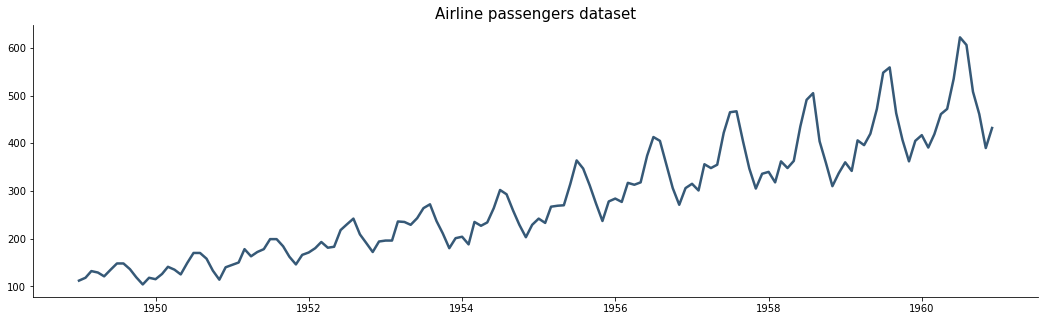

In [27]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 18, 5
rcParams['lines.linewidth'] = 2.5

# Load the dataset
df = pd.read_csv('airline-passengers.csv', index_col='Month', parse_dates=True)

# Plot
plt.title('Airline passengers dataset', size=15)
plt.plot(df)

## Moving average for 3 different window size
We will be calculating moving average for 3 different window sizes 5, 10 and 15. Calculated moving average is shown in the figure along with original dataset.

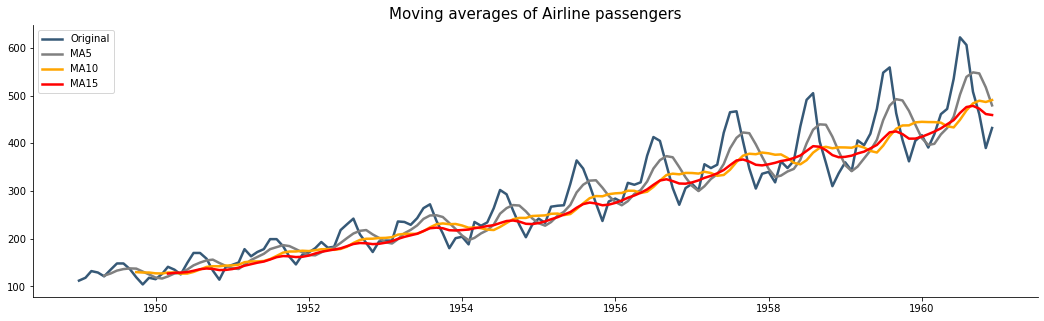

In [31]:

# Calculcate
df['MA5'] = df['Passengers'].rolling(window=5).mean()
df['MA10'] = df['Passengers'].rolling(window=10).mean()
df['MA15'] = df['Passengers'].rolling(window=15).mean()

# Plot
plt.title('Moving averages of Airline passengers', size=15)
plt.plot(df['Passengers'], label='Original')
plt.plot(df['MA5'], color='gray', label='MA5')
plt.plot(df['MA10'], color='orange', label='MA10')
plt.plot(df['MA15'], color='red', label='MA15')
plt.legend();